## Week 1##

Here, we produce histograms showing the average temperatures for a given time period in different areas

### Using Xarray to import ###

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import xarray as xr
path = 'data/riskindex/netcdf/max_temperature/'

In [4]:
#load 'observed' temperatures for LONDON
data_era = xr.open_dataarray(path + 'London_ERAI.nc')
data_era

<xarray.DataArray 'MX2T' (time: 13870)>
array([273.09656, 273.35147, 283.5008 , ..., 280.2819 , 284.54987, 285.18195],
      dtype=float32)
Coordinates:
    day_of_year  (time) int64 ...
    surface      float32 ...
    year         (time) int64 ...
  * time         (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2017-12-31
    lon          float64 ...
    lat          float64 ...
Attributes:
    long_name:     Maximum 2 metre temperature since previous post-processing
    units:         K
    cell_methods:  day_of_year: year: maximum
    city:          London
    rcp:           None
    model_type:    era

### Converting to pandas dataframe ### 

In [5]:
from downloader import dataprocessing
#ERA-Interim
df_era = dataprocessing.da_to_df(data_era)
df_era.head()

,data
time,
1980-01-01,273.096558
1980-01-02,273.351471
1980-01-03,283.500793
1980-01-04,283.673218
1980-01-05,279.352417


(array([   2.,   13.,   41.,  144.,  377.,  691.,  958., 1328., 1599.,
        1480., 1306., 1441., 1436., 1263.,  872.,  562.,  233.,   92.,
          25.,    7.]),
 array([267.0666 , 268.9859 , 270.9052 , 272.82452, 274.74384, 276.66315,
        278.58243, 280.50174, 282.42105, 284.34036, 286.25967, 288.179  ,
        290.0983 , 292.0176 , 293.93692, 295.8562 , 297.7755 , 299.69482,
        301.61414, 303.53345, 305.45276], dtype=float32),
 <a list of 20 Patch objects>)

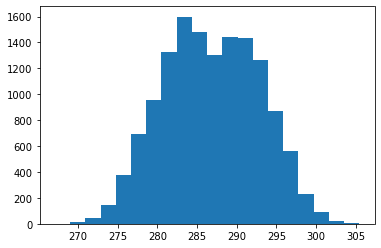

In [6]:
plt.figure()
plt.hist(df_era['data'], label = 'ERA', bins=20)

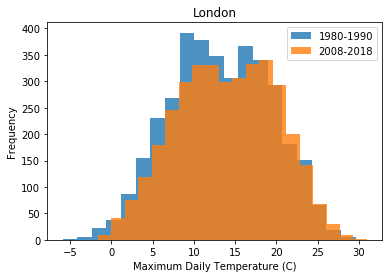

In [7]:
df_era['temp_celcius'] = df_era['data'] - 273
df_past = df_era['1980-01-01':'1990-01-01']
df_present = df_era['2007-12-31':'2017-12-31']


plt.figure()
plt.hist(df_past.temp_celcius, label = '1980-1990', bins=20, alpha = 0.8)
plt.hist(df_present.temp_celcius, label = '2008-2018', bins=20, alpha = 0.8)
plt.ylabel('Frequency')
plt.xlabel('Maximum Daily Temperature (C)')
plt.title('London')
plt.legend()
plt.show()
#can copy code
